In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections



### Read data from folder

In [2]:
Rawdata = pd.read_csv('F:\Jupyter Notebook\Jimmy Wrangler, Data Explorer\data\crime1.csv', encoding='latin',low_memory=False)
Rawdata.head()
Rawdata.shape

(327820, 17)

In [3]:
Rawdata2 = pd.read_csv('F:\Jupyter Notebook\Jimmy Wrangler, Data Explorer\data\crime2.csv', encoding='latin',low_memory=False)
Rawdata2.head()
Rawdata2.shape

(319073, 17)

### Merge two data by append()
Show the size of data

In [4]:
data = Rawdata.append(Rawdata2)
data = data.drop_duplicates(subset=['INCIDENT_NUMBER'],keep='first')
data.shape

(290158, 17)

From the head tabal, we can see there are different incidents, each indident has its id_number.

In [5]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


### Data Visualization

Data includes incidents from 2015 to 2018. Here we show the histogram of crime data by different year.

2017    89382
2016    87927
2018    65894
2015    46955
Name: YEAR, dtype: int64


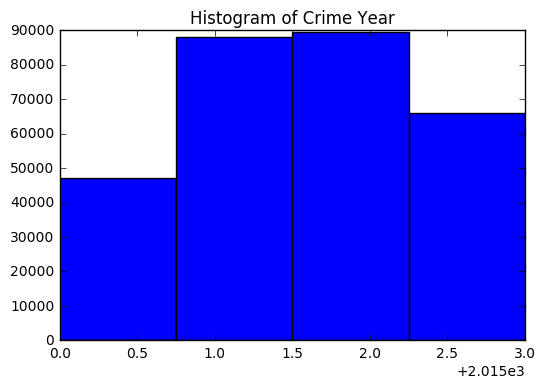

In [6]:
print(data.YEAR.value_counts())
plt.hist(data['YEAR'],bins=4,range= (2015,2018))
plt.title('Histogram of Crime Year')
plt.show()

To show the distribution of location of crime incident, first we drop the data which has no location information.

In [7]:
data = data.dropna(axis=0, subset=['STREET','Lat','Long'], inplace = False)
data.shape

(270868, 17)

From the distribution of date by month of crime incident in 2017 , we can see that most of crime incident happens on May to October. One possible reason is that summer is the mainly season for tour, which increase the possibility of some kinds of incient such as robbery and vehicle incident.

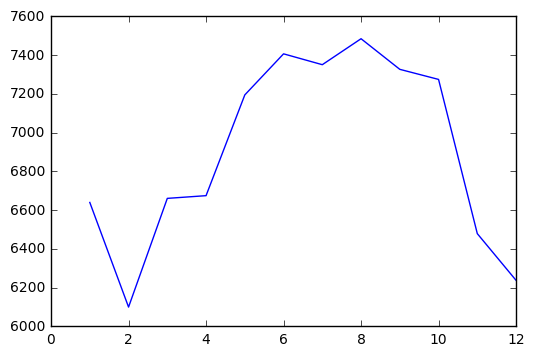

In [8]:
Crime2017 = data[data['YEAR']==2017]
numMon2017 = Crime2017['MONTH'].value_counts()
CrimeMon2017 = []
for i in range(1,13):
    CrimeMon2017.append(numMon2017[i])
x_axis = list(range(1,13))
plt.plot(x_axis, CrimeMon2017)
plt.show()

The following figure shows the 5-highest categories of crime

<Container object of 5 artists>

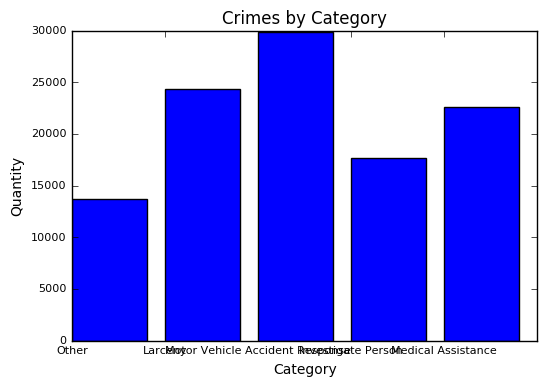

In [9]:
offense_code_group = data['OFFENSE_CODE_GROUP'].value_counts()
offense_code_group = offense_code_group[0:5].to_dict()

names_offense_code_group = offense_code_group.keys()
values_offense_code_group = offense_code_group.values()

x = range(len(names_offense_code_group))

plt.figure()
plt.title('Crimes by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.tick_params(labelsize=8)
plt.bar(x, values_offense_code_group, tick_label=names_offense_code_group)

With district infomation, we can show the distribution of district of crime incident.

<Container object of 12 artists>

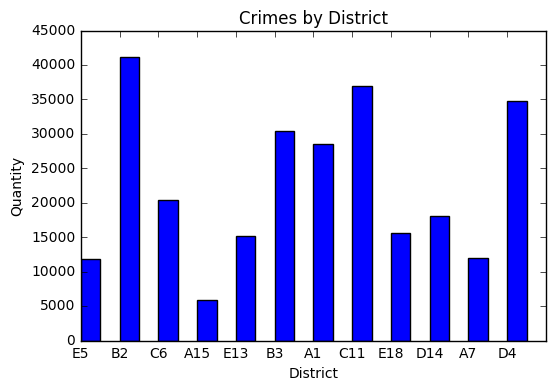

In [10]:
lista_district = data['DISTRICT'].value_counts()
dict_district = lista_district.to_dict()

names_district = dict_district.keys()
values_district = dict_district.values()

x = range(len(names_district))

plt.figure()
plt.title('Crimes by District')
plt.xlabel('District')
plt.ylabel('Quantity')
plt.bar(x, values_district, width=0.5, tick_label=names_district)

With location infomation, we can show the distribution of latitude and longtitue of crime incident.

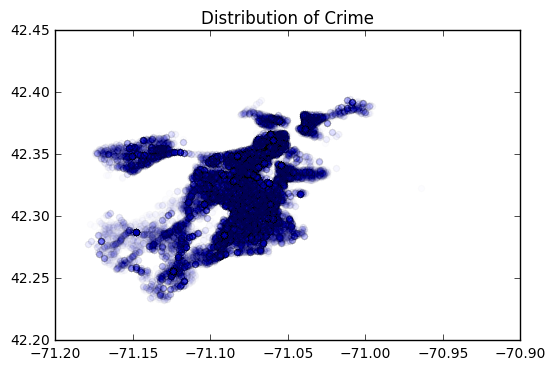

In [11]:
tmp = Crime2017[Crime2017.Lat==-1]
Crime2017 = Crime2017.drop(tmp.index)
x_axis = list(Crime2017.Long)
y_axis = list(Crime2017.Lat)
plt.scatter(x_axis, y_axis,alpha = 0.01)
#plt.axis = ([min(Crime2017.Long),max(Crime2017.Long),min(Crime2017.Lat),max(Crime2017.Lat)])
plt.title('Distribution of Crime')
plt.show()

Additionally, combining the district and location can show the distribuion of crime incident clearly and directally.

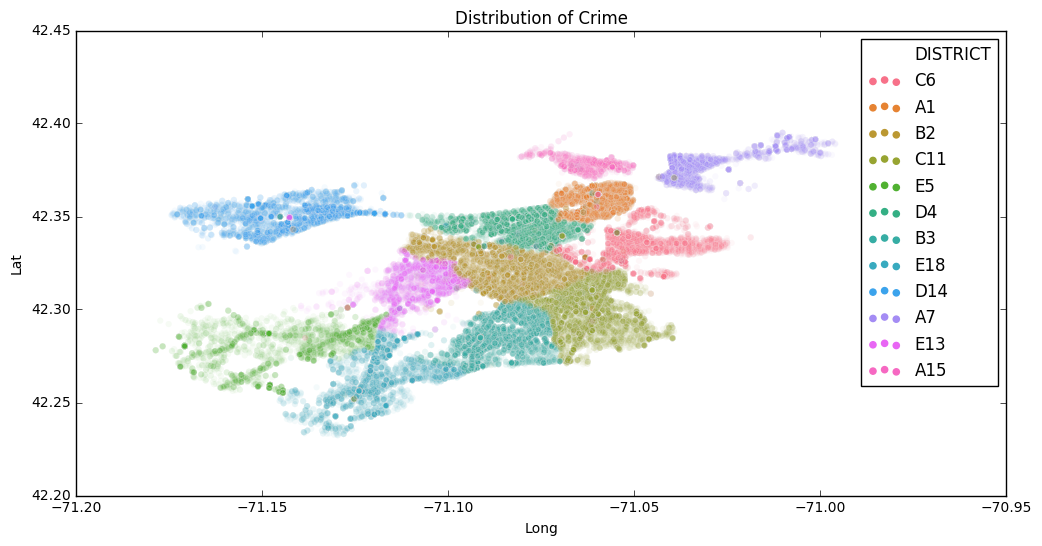

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Long',
                y='Lat',
                hue='DISTRICT',
                alpha=0.05,
               data=Crime2017)
plt.title('Distribution of Crime')
plt.show()